<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h3>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Berrueco II"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros<p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Tamaño archivos cargados: 1540 x 980 



<p>Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1</p>

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr>
<h3>Tratamiento de datos</h3>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Orientaciones'] != 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Factor_LS'] >= 0]
datos = datos[datos['Pendiente'] != -9999.0]

print("Número de datos despues del tratamiento ", datos.size)

datos = datos.round(4) 

# Geología
datos.loc[datos.Geologia == 9001, "Geologia"] = "Conglomerados"
datos.loc[datos.Geologia == 9004, "Geologia"] = "Arenas_fondo"
datos.loc[datos.Geologia == 9103, "Geologia"] = "Calizas_dolomias"
datos.loc[datos.Geologia == 9132, "Geologia"] = "Calcarenitas"
datos.loc[datos.Geologia == 9133, "Geologia"] = "Margas"
datos.loc[datos.Geologia == 9134, "Geologia"] = "Areniscas"
datos.loc[datos.Geologia == 9201, "Geologia"] = "Unidades_guadalquivir"
datos.loc[datos.Geologia == 9202, "Geologia"] = "Calizas_margosas"

# Unidades edáficas
datos.loc[datos.Unidades_Edaficas == 1, "Unidades_Edaficas"] = "Vertisoles_CCV"
datos.loc[datos.Unidades_Edaficas == 2, "Unidades_Edaficas"] = "Cambisoles_VVCCC"
datos.loc[datos.Unidades_Edaficas == 3, "Unidades_Edaficas"] = "Regosoles_CLCC"
datos.loc[datos.Unidades_Edaficas == 4, "Unidades_Edaficas"] = "Cambisoles_VRCVC"
datos.loc[datos.Unidades_Edaficas == 5, "Unidades_Edaficas"] = "Vertisoles_P"
datos.loc[datos.Unidades_Edaficas == 6, "Unidades_Edaficas"] = "Regosoles_CC"

# Usos del suelo
datos.loc[datos.Usos_Del_Suelo == 1, "Usos_Del_Suelo"] = "Tejido_urbano"
datos.loc[datos.Usos_Del_Suelo == 2, "Usos_Del_Suelo"] = "Olivares"
datos.loc[datos.Usos_Del_Suelo == 3, "Usos_Del_Suelo"] = "Cultivos_permanentes"
datos.loc[datos.Usos_Del_Suelo == 4, "Usos_Del_Suelo"] = "Pastizales"

# Orientaciones
datos.loc[datos.Orientaciones == 1, "Orientaciones"] = "Norte"
datos.loc[datos.Orientaciones == 2, "Orientaciones"] = "Noreste"
datos.loc[datos.Orientaciones == 3, "Orientaciones"] = "Este"
datos.loc[datos.Orientaciones == 4, "Orientaciones"] = "Sureste"
datos.loc[datos.Orientaciones == 5, "Orientaciones"] = "Sur"
datos.loc[datos.Orientaciones == 6, "Orientaciones"] = "Suroeste"
datos.loc[datos.Orientaciones == 7, "Orientaciones"] = "Oeste"
datos.loc[datos.Orientaciones == 8, "Orientaciones"] = "Noroeste"

Número de datos antes del tratamiento  30133620
Número de datos despues del tratamiento  29781260


<hr>
<h3>Proceso de visualización de datos</h3>

<hr>
<h3>Altitud</h3>

In [9]:
print("Max: " , max(datos.Altitud))
print("Min: " , min(datos.Altitud))
print("Media: " , datos["Altitud"].mean())
print("STD: " , datos["Altitud"].std())

Max:  597.33
Min:  319.743
Media:  434.86834825926707
STD:  45.975233684242504


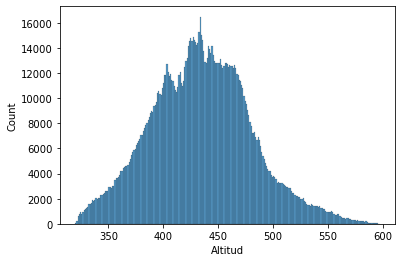

In [10]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>
<h3>Arcillas</h3>

In [11]:
print("Max: " , max(datos.Arcillas))
print("Min: " , min(datos.Arcillas))
print("Media: " , datos["Arcillas"].mean())
print("STD: " , datos["Arcillas"].std())

Max:  49.0545
Min:  28.5357
Media:  39.37209290781703
STD:  4.909489042975106


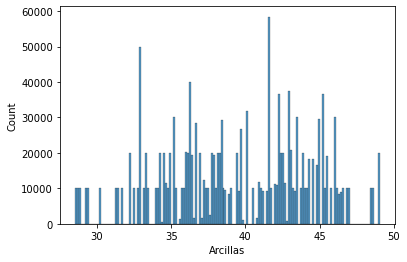

In [12]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>
<h3>Arenas</h3>

In [13]:
print("Max: " , max(datos.Arenas))
print("Min: " , min(datos.Arenas))
print("Media: " , datos["Arenas"].mean())
print("STD: " , datos["Arenas"].std())

Max:  28.2915
Min:  4.7204
Media:  16.547102316769877
STD:  4.480609904769937


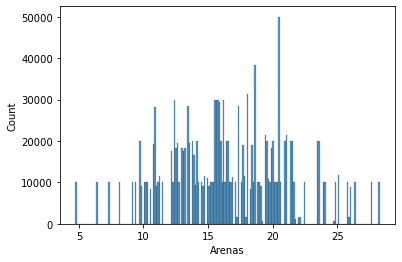

In [14]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>
<h3>Carbonatos</h3>

3.0    1432314
4.0      56749
Name: Carbonatos, dtype: int64


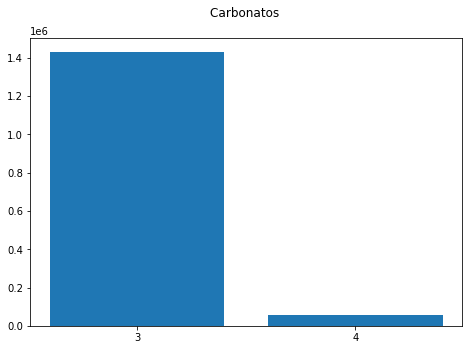

In [15]:
print(datos['Carbonatos'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['3','4']
valores = [1432314, 56749]
ax.bar(langs, valores)
plt.title('Carbonatos \n')
plt.show()

<hr>
<h3>Carbono orgánico</h3>

In [16]:
print("Max: " , max(datos.Carbono_Organico))
print("Min: " , min(datos.Carbono_Organico))
print("Media: " , datos["Carbono_Organico"].mean())
print("STD: " , datos["Carbono_Organico"].std())

Max:  620.1922
Min:  198.5485
Media:  421.0801514448174
STD:  108.26356738138614


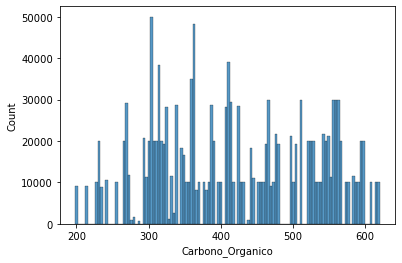

In [17]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>
<h3>Cárcavas</h3>

0.0    1433831
1.0      55232
Name: Carcavas, dtype: int64


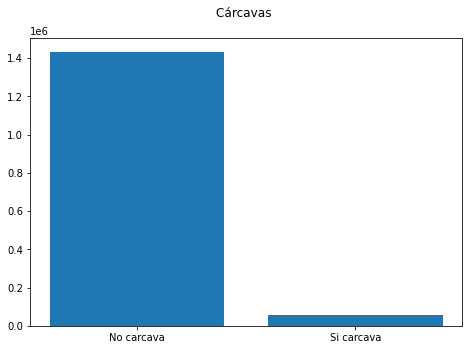

In [48]:
print(datos['Carcavas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['No carcava','Si carcava']
valores = [1433831, 55232]
ax.bar(langs, valores)
plt.title('Cárcavas \n')
plt.show()

<hr>
<h3>Curvatura perfil</h3>

In [19]:
print("Max: " , max(datos.Curvatura_Perfil))
print("Min: " , min(datos.Curvatura_Perfil))
print("Media: " , datos["Curvatura_Perfil"].mean())
print("STD: " , datos["Curvatura_Perfil"].std())

Max:  41.2935
Min:  -34.9537
Media:  0.01789142460728699
STD:  1.5906682197191133


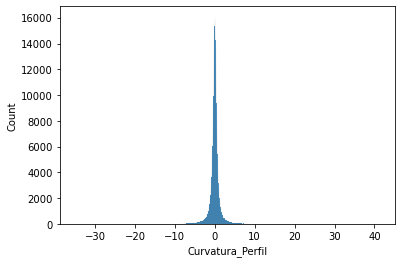

In [20]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>
<h3>Curvatura plana</h3>

In [21]:
print("Max: " , max(datos.Curvatura_Plana))
print("Min: " , min(datos.Curvatura_Plana))
print("Media: " , datos["Curvatura_Plana"].mean())
print("STD: " , datos["Curvatura_Plana"].std())

Max:  50.111
Min:  -38.3291
Media:  0.018944977546282587
STD:  1.3126746909426443


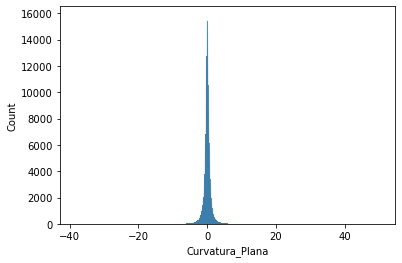

In [22]:
sns.histplot(data=datos, x="Curvatura_Plana")
plt.show()

<hr>
<h3>Distancia carreteras</h3>

In [23]:
print("Max: " , max(datos.Distancia_Carreteras))
print("Min: " , min(datos.Distancia_Carreteras))
print("Media: " , datos["Distancia_Carreteras"].mean())
print("STD: " , datos["Distancia_Carreteras"].std())

Max:  3142.4553
Min:  0.0
Media:  703.6725477950106
STD:  607.0715454121354


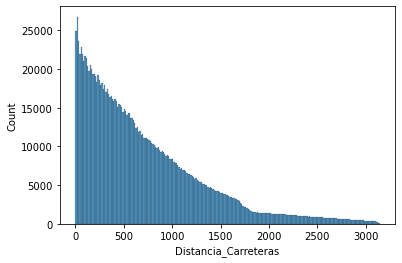

In [24]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>
<h3>Factor LS</h3>

In [25]:
print("Max: " , max(datos.Factor_LS))
print("Min: " , min(datos.Factor_LS))
print("Media: " , datos["Factor_LS"].mean())
print("STD: " , datos["Factor_LS"].std())

Max:  17.9098
Min:  0.0
Media:  2.2519097195350817
STD:  1.7670713185877405


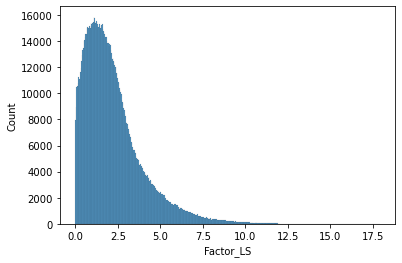

In [26]:
sns.histplot(data=datos, x="Factor_LS")
plt.show()

<hr>
<h3>Geología</h3>


Unidades_guadalquivir    831046
Margas                   442862
Calizas_margosas          82415
Arenas_fondo              54885
Areniscas                 30833
Calizas_dolomias          28455
Conglomerados             15622
Calcarenitas               2945
Name: Geologia, dtype: int64


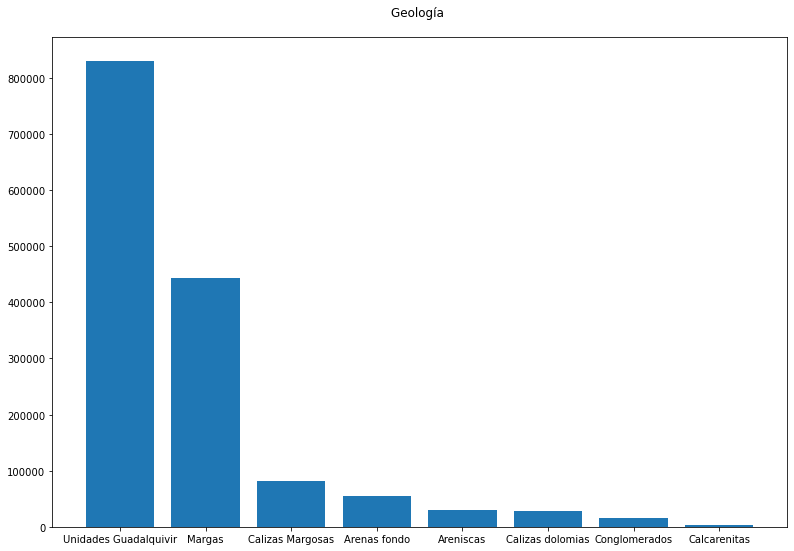

In [27]:
print(datos['Geologia'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Unidades Guadalquivir','Margas', 'Calizas Margosas', 'Arenas fondo', 'Areniscas', 'Calizas dolomias',
        'Conglomerados', 'Calcarenitas']
valores = [datos['Geologia'].value_counts().Unidades_guadalquivir, datos['Geologia'].value_counts().Margas,
          datos['Geologia'].value_counts().Calizas_margosas, datos['Geologia'].value_counts().Arenas_fondo,
          datos['Geologia'].value_counts().Areniscas, datos['Geologia'].value_counts().Calizas_dolomias,
          datos['Geologia'].value_counts().Conglomerados, datos['Geologia'].value_counts().Calcarenitas]
ax.bar(langs, valores)
plt.title('Geología \n')
plt.show()

<hr>
<h3>Limos</h3>

In [28]:
print("Max: " , max(datos.Limos))
print("Min: " , min(datos.Limos))
print("Media: " , datos["Limos"].mean())
print("STD: " , datos["Limos"].std())

Max:  53.6892
Min:  33.2448
Media:  44.08080904807895
STD:  3.6885495515367803


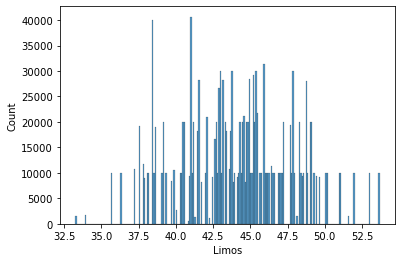

In [29]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>
<h3>Orientaciones</h3>

Norte       249256
Sur         208671
Noreste     199276
Noroeste    186053
Sureste     184410
Suroeste    173326
Oeste       151606
Este        136465
Name: Orientaciones, dtype: int64


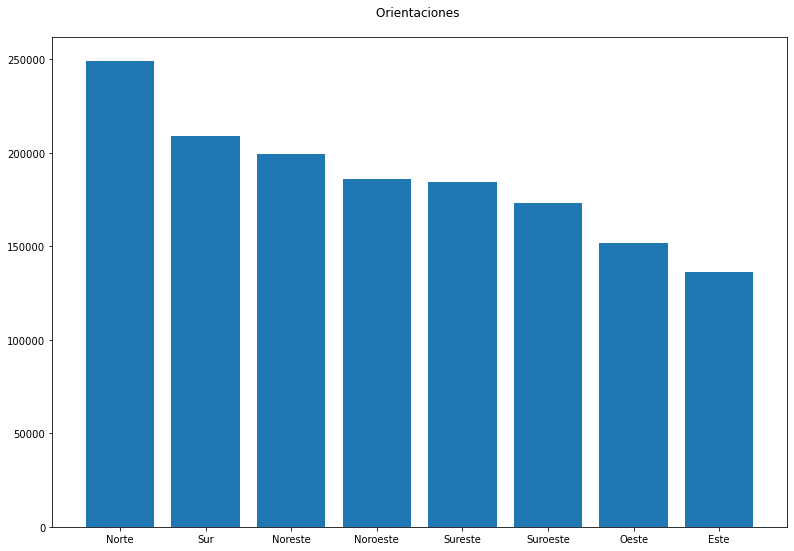

In [30]:
print(datos['Orientaciones'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Norte','Sur', 'Noreste', 'Noroeste', 'Sureste', 'Suroeste',
        'Oeste', 'Este']
valores = [datos['Orientaciones'].value_counts().Norte, datos['Orientaciones'].value_counts().Sur,
          datos['Orientaciones'].value_counts().Noreste, datos['Orientaciones'].value_counts().Noroeste,
          datos['Orientaciones'].value_counts().Sureste, datos['Orientaciones'].value_counts().Suroeste,
          datos['Orientaciones'].value_counts().Oeste, datos['Orientaciones'].value_counts().Este]
ax.bar(langs, valores)
plt.title('Orientaciones \n')
plt.show()

<hr>
<h3>Overland_Flow_Distance</h3>


In [31]:
print("Max: " , max(datos.Overland_Flow_Distance))
print("Min: " , min(datos.Overland_Flow_Distance))
print("Media: " , datos["Overland_Flow_Distance"].mean())
print("STD: " , datos["Overland_Flow_Distance"].std())

Max:  5951.6348
Min:  0.0
Media:  1878.9950472283203
STD:  1293.8538085946154


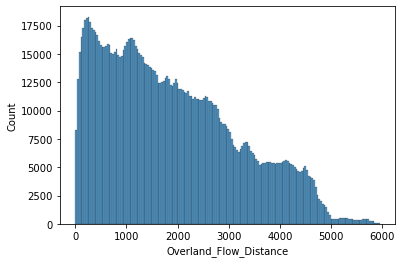

In [32]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>
<h3>Pendiente</h3>

In [33]:
print("Max: " , max(datos.Pendiente))
print("Min: " , min(datos.Pendiente))
print("Media: " , datos["Pendiente"].mean())
print("STD: " , datos["Pendiente"].std())

Max:  55.5442
Min:  0.0
Media:  9.216859226037275
STD:  5.707764998918666


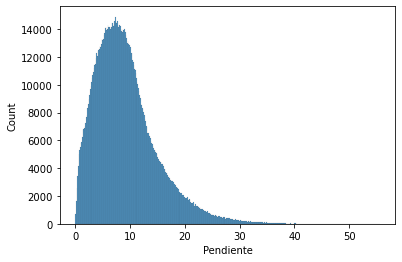

In [34]:
sns.histplot(data=datos, x="Pendiente")
plt.show()

<hr>
<h3>Stream_Power_Index</h3>

In [35]:
print("Max: " , max(datos.Stream_Power_Index))
print("Min: " , min(datos.Stream_Power_Index))
print("Media: " , datos["Stream_Power_Index"].mean())
print("STD: " , datos["Stream_Power_Index"].std())

Max:  5080776704.0
Min:  -5917084672.0
Media:  10176.383098662332
STD:  8608378.153642187


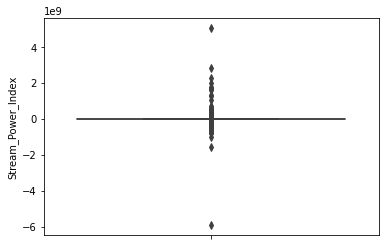

In [36]:
sns.boxplot(y=datos["Stream_Power_Index"] )
plt.show()

<hr>
<h3>Topographic_Position_Index</h3>

In [37]:
print("Max: " , max(datos.Topographic_Position_Index))
print("Min: " , min(datos.Topographic_Position_Index))
print("Media: " , datos["Topographic_Position_Index"].mean())
print("STD: " , datos["Topographic_Position_Index"].std())

Max:  22.6812
Min:  -22.0299
Media:  0.0021773443433898347
STD:  3.321313660698497


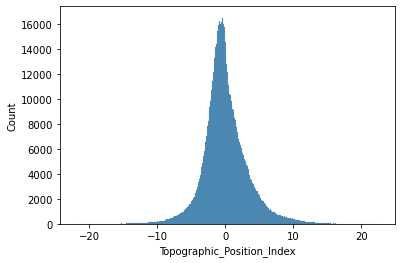

In [38]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h3>Topographic_Wetness_Index</h3>

In [39]:
print("Max: " , max(datos.Topographic_Wetness_Index))
print("Min: " , min(datos.Topographic_Wetness_Index))
print("Media: " , datos["Topographic_Wetness_Index"].mean())
print("STD: " , datos["Topographic_Wetness_Index"].std())

Max:  23.729
Min:  -9.1094
Media:  9.541667104480776
STD:  3.878487751667112


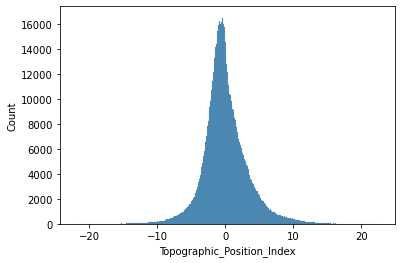

In [40]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>
<h3>Unidades edáficas</h3>

Regosoles_CC        958313
Regosoles_CLCC      253134
Vertisoles_CCV      131769
Cambisoles_VRCVC     74784
Vertisoles_P         44997
Cambisoles_VVCCC     26066
Name: Unidades_Edaficas, dtype: int64


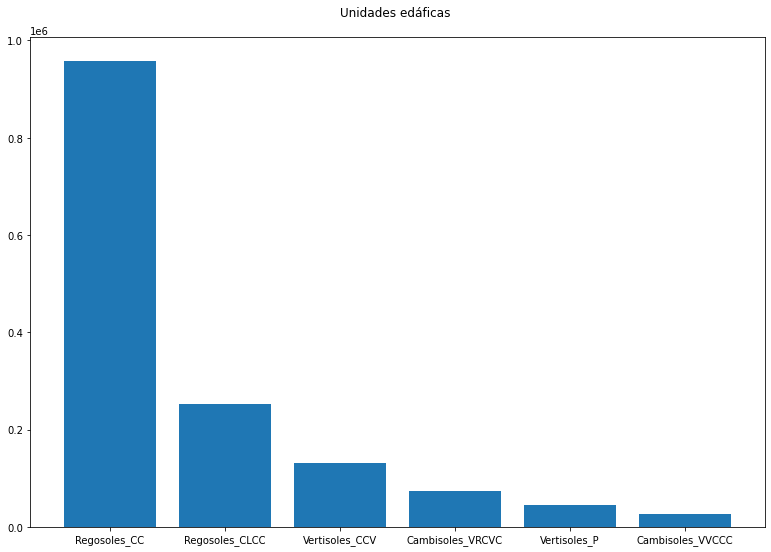

In [41]:
print(datos['Unidades_Edaficas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Regosoles_CC','Regosoles_CLCC', 'Vertisoles_CCV', 'Cambisoles_VRCVC', 'Vertisoles_P', 'Cambisoles_VVCCC']
valores = [datos['Unidades_Edaficas'].value_counts().Regosoles_CC, datos['Unidades_Edaficas'].value_counts().Regosoles_CLCC,
          datos['Unidades_Edaficas'].value_counts().Vertisoles_CCV, datos['Unidades_Edaficas'].value_counts().Cambisoles_VRCVC,
          datos['Unidades_Edaficas'].value_counts().Vertisoles_P, datos['Unidades_Edaficas'].value_counts().Cambisoles_VVCCC]
ax.bar(langs, valores)
plt.title('Unidades edáficas \n')
plt.show()

<hr>
<h3>Usos del suelo</h3>


Olivares                1428007
Cultivos_permanentes      43350
Tejido_urbano             11808
Pastizales                 5898
Name: Usos_Del_Suelo, dtype: int64


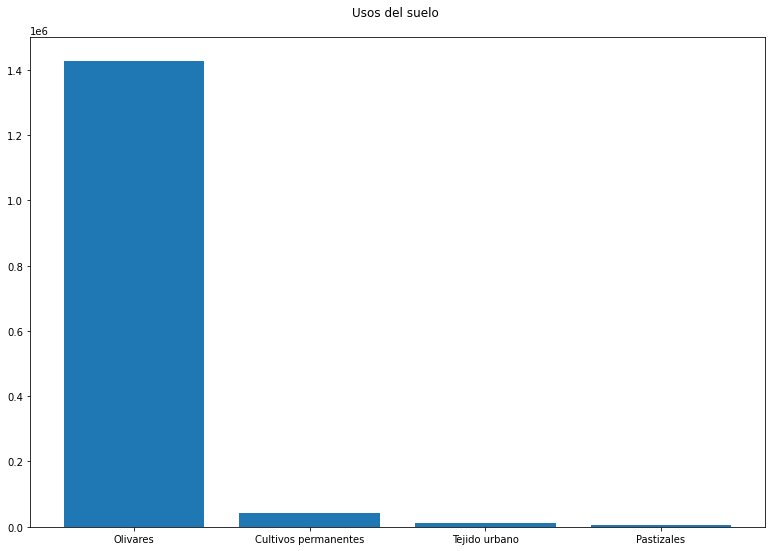

In [42]:
print(datos['Usos_Del_Suelo'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1.7,1.7])
langs = ['Olivares','Cultivos permanentes', 'Tejido urbano', 'Pastizales']
valores = [datos['Usos_Del_Suelo'].value_counts().Olivares, datos['Usos_Del_Suelo'].value_counts().Cultivos_permanentes,
          datos['Usos_Del_Suelo'].value_counts().Tejido_urbano, datos['Usos_Del_Suelo'].value_counts().Pastizales]
ax.bar(langs, valores)
plt.title('Usos del suelo \n')
plt.show()

<hr>
<h3>Matriz de correlación de variables</h3>

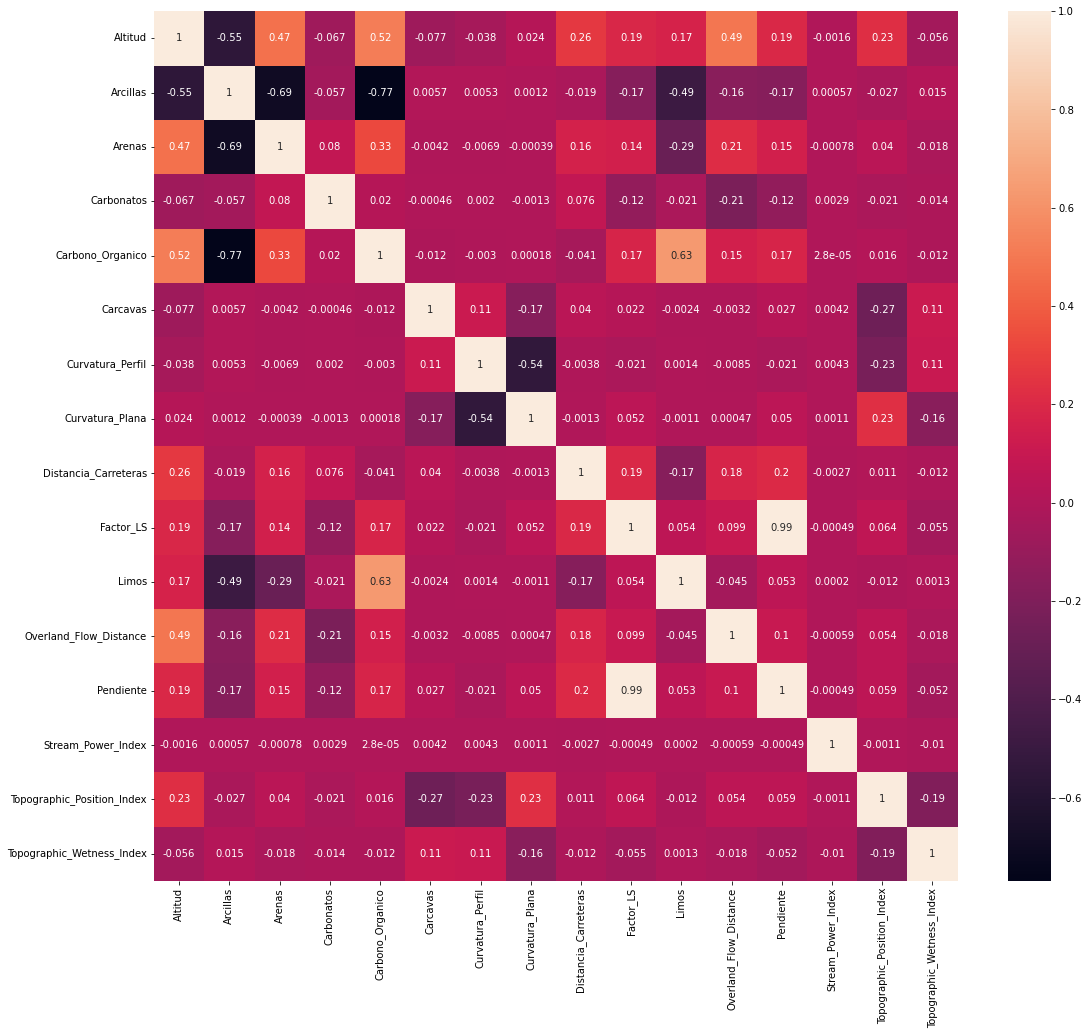

In [43]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()